<a href="https://colab.research.google.com/github/KHN70/CN6005-Ai-Weekly-Portfolio/blob/main/Week4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import regularizers
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

Outcome
1    3320
0    1680
Name: count, dtype: int64
Epoch 1/100


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


100/100 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.6319 - loss: 0.8930 - val_accuracy: 0.6700 - val_loss: 0.8158
Epoch 2/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6202 - loss: 0.8373 - val_accuracy: 0.6775 - val_loss: 0.7761
Epoch 3/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6551 - loss: 0.7872 - val_accuracy: 0.6775 - val_loss: 0.7471
Epoch 4/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6504 - loss: 0.7536 - val_accuracy: 0.6775 - val_loss: 0.7219
Epoch 5/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6588 - loss: 0.7313 - val_accuracy: 0.6775 - val_loss: 0.7019
Epoch 6/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6603 - loss: 0.7128 - val_accuracy: 0.6775 - val_loss: 0.6863
Epoch 7/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6594 - loss: 0.6953 - val_accuracy: 0.6775 - val_loss: 0.6730
Epoch 8/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6506 - loss: 0.6878 - val_accuracy: 0.677

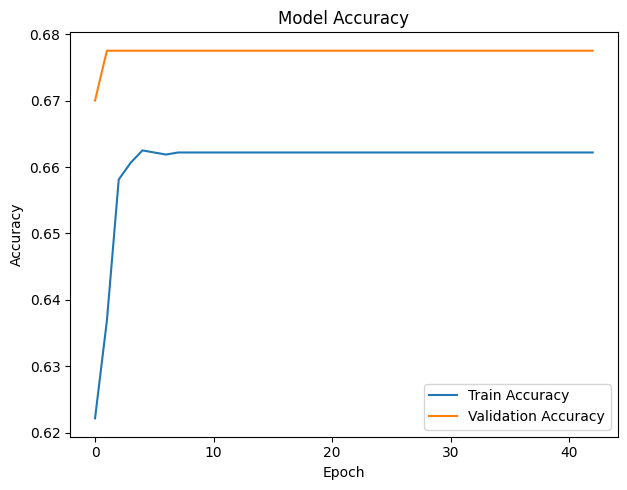

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


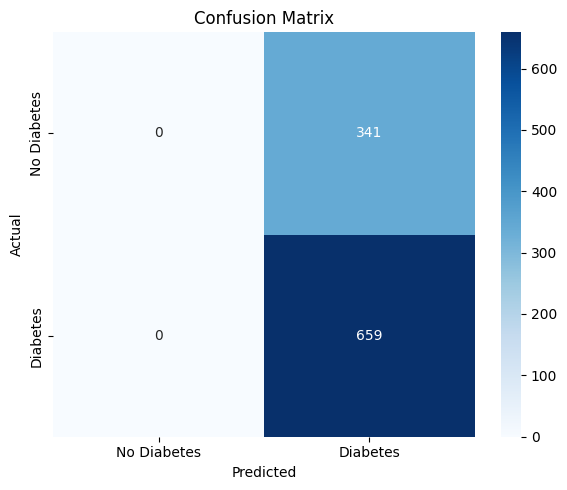

Accuracy: 0.6590
Precision: 0.6590
Recall: 1.0000

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       341
           1       0.66      1.00      0.79       659

    accuracy                           0.66      1000
   macro avg       0.33      0.50      0.40      1000
weighted avg       0.43      0.66      0.52      1000



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [6]:
# Load the dataset
path="Diabetes_ANN.csv"
df = pd.read_csv(path)

class_counts = df['Outcome'].value_counts()

# Display the result
print(class_counts)

# Separate features and target
X = df.drop(columns=['Outcome'])
y = df['Outcome']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build the ANN model
model = Sequential([

 Dense(16, activation='relu', input_shape=(X_train_scaled.shape[1],),
          kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(8, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1, activation='sigmoid')

   ])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Early stopping to prevent overfitting
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
history = model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, validation_split=0.2, callbacks=[early_stop], verbose=1)

plt.figure(figsize=(12, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()


plt.tight_layout()
plt.show()

# Predict on test data
y_pred_prob = model.predict(X_test_scaled)
y_pred = (y_pred_prob > 0.5).astype("int32")


# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Diabetes', 'Diabetes'],
            yticklabels=['No Diabetes', 'Diabetes'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Print evaluation metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print("\nClassification Report:\n", report)

In [7]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Print evaluation metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print("\nClassification Report:\n", report)

Accuracy: 0.6590
Precision: 0.6590
Recall: 1.0000

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       341
           1       0.66      1.00      0.79       659

    accuracy                           0.66      1000
   macro avg       0.33      0.50      0.40      1000
weighted avg       0.43      0.66      0.52      1000



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [8]:
from sklearn.linear_model import LogisticRegression

# Instantiate and train Logistic Regression model
log_reg_model = LogisticRegression(random_state=42)
log_reg_model.fit(X_train_scaled, y_train)

LogisticRegression(random_state=42)

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Logistic Regression Accuracy: 0.6590
Logistic Regression Precision: 0.6590
Logistic Regression Recall: 1.0000

Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       341
           1       0.66      1.00      0.79       659

    accuracy                           0.66      1000
   macro avg       0.33      0.50      0.40      1000
weighted avg       0.43      0.66      0.52      1000



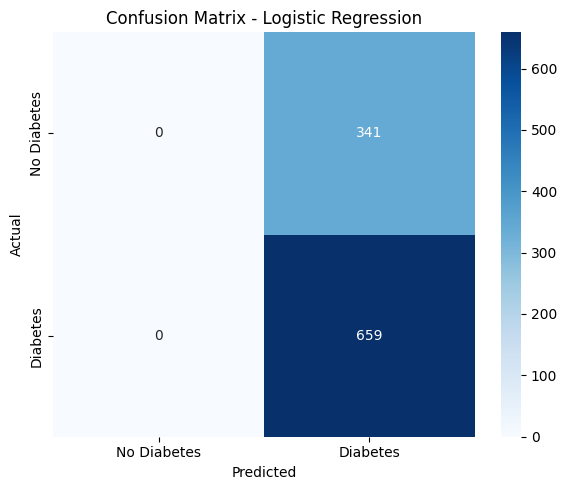

In [9]:
# Predict on test data
y_pred_log_reg = log_reg_model.predict(X_test_scaled)

# Evaluate the model
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
precision_log_reg = precision_score(y_test, y_pred_log_reg)
recall_log_reg = recall_score(y_test, y_pred_log_reg)
report_log_reg = classification_report(y_test, y_pred_log_reg)

# Print evaluation metrics
print(f"Logistic Regression Accuracy: {accuracy_log_reg:.4f}")
print(f"Logistic Regression Precision: {precision_log_reg:.4f}")
print(f"Logistic Regression Recall: {recall_log_reg:.4f}")
print("\nLogistic Regression Classification Report:\n", report_log_reg)

# Confusion matrix
cm_log_reg = confusion_matrix(y_test, y_pred_log_reg)

# Plot confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm_log_reg, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Diabetes', 'Diabetes'],
            yticklabels=['No Diabetes', 'Diabetes'])
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

In [10]:
# Print metrics for ANN
print("--- Artificial Neural Network (ANN) Metrics ---")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print("\nClassification Report:\n", report)

print("\n--- Logistic Regression Metrics ---")
print(f"Accuracy: {accuracy_log_reg:.4f}")
print(f"Precision: {precision_log_reg:.4f}")
print(f"Recall: {recall_log_reg:.4f}")
print("\nClassification Report:\n", report_log_reg)

print("\n--- Model Comparison ---")
print(f"Metric      | ANN     | Logistic Regression")
print(f"------------|---------|--------------------")
print(f"Accuracy    | {accuracy:.4f}  | {accuracy_log_reg:.4f}")
print(f"Precision   | {precision:.4f}  | {precision_log_reg:.4f}")
print(f"Recall      | {recall:.4f}  | {recall_log_reg:.4f}")

--- Artificial Neural Network (ANN) Metrics ---
Accuracy: 0.6590
Precision: 0.6590
Recall: 1.0000

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       341
           1       0.66      1.00      0.79       659

    accuracy                           0.66      1000
   macro avg       0.33      0.50      0.40      1000
weighted avg       0.43      0.66      0.52      1000


--- Logistic Regression Metrics ---
Accuracy: 0.6590
Precision: 0.6590
Recall: 1.0000

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       341
           1       0.66      1.00      0.79       659

    accuracy                           0.66      1000
   macro avg       0.33      0.50      0.40      1000
weighted avg       0.43      0.66      0.52      1000


--- Model Comparison ---
Metric      | ANN     | Logistic Regression
------------|---------|------------------

## Summary:

### Data Analysis Key Findings

*   Both the Artificial Neural Network (ANN) and Logistic Regression models achieved identical performance metrics on the test dataset: Accuracy of 0.6590, Precision of 0.6590, and Recall of 1.0000.
*   Both models showed a Recall of 1.0000 for class 1 (Diabetes), correctly identifying all instances of diabetes in the test set.
*   Both models had a Precision of 0.0000 for class 0 (No Diabetes) and a Recall of 0.0000 for class 0, indicating that neither model correctly identified any instances of non-diabetes.
*   The confusion matrices for both models revealed that they predicted the positive class (Diabetes) for all instances in the test set.

